In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [21]:
df = pd.read_excel(r"/content/D202.xlsx" )
df

,TYPE,LastTransactionDate,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,2016-10-22,00:00:00,00:14:00,0.01,kWh,0.00,NaN
1,Electric usage,2016-10-22,00:15:00,00:29:00,0.01,kWh,0.00,NaN
2,Electric usage,2016-10-22,00:30:00,00:44:00,0.01,kWh,0.00,NaN
3,Electric usage,2016-10-22,00:45:00,00:59:00,0.01,kWh,0.00,NaN
4,Electric usage,2016-10-22,01:00:00,01:14:00,0.01,kWh,0.00,NaN
...,...,...,...,...,...,...,...,...
70363,Electric usage,2018-10-24,22:45:00,22:59:00,0.02,kWh,0.00,NaN
70364,Electric usage,2018-10-24,23:00:00,23:14:00,0.03,kWh,0.01,NaN
70365,Electric usage,2018-10-24,23:15:00,23:29:00,0.03,kWh,0.01,NaN
70366,Electric usage,2018-10-24,23:30:00,23:44:00,0.03,kWh,0.01,NaN


In [23]:
df['LastTransactionDate']

0       2016-10-22
1       2016-10-22
2       2016-10-22
3       2016-10-22
4       2016-10-22
           ...    
70363   2018-10-24
70364   2018-10-24
70365   2018-10-24
70366   2018-10-24
70367   2018-10-24
Name: LastTransactionDate, Length: 70368, dtype: datetime64[ns]

In [24]:
df["LastTransactionDate"] = pd.to_datetime(df["LastTransactionDate"])
#df = df.rename(columns={"DATE": "ds", "USAGE": "y"})
df


,TYPE,LastTransactionDate,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,2016-10-22,00:00:00,00:14:00,0.01,kWh,0.00,NaN
1,Electric usage,2016-10-22,00:15:00,00:29:00,0.01,kWh,0.00,NaN
2,Electric usage,2016-10-22,00:30:00,00:44:00,0.01,kWh,0.00,NaN
3,Electric usage,2016-10-22,00:45:00,00:59:00,0.01,kWh,0.00,NaN
4,Electric usage,2016-10-22,01:00:00,01:14:00,0.01,kWh,0.00,NaN
...,...,...,...,...,...,...,...,...
70363,Electric usage,2018-10-24,22:45:00,22:59:00,0.02,kWh,0.00,NaN
70364,Electric usage,2018-10-24,23:00:00,23:14:00,0.03,kWh,0.01,NaN
70365,Electric usage,2018-10-24,23:15:00,23:29:00,0.03,kWh,0.01,NaN
70366,Electric usage,2018-10-24,23:30:00,23:44:00,0.03,kWh,0.01,NaN


In [27]:
df22 = df.groupby("LastTransactionDate")["USAGE"].sum().reset_index()
df22 = df22.rename(columns={"LastTransactionDate": "ds", "USAGE": "y"})
df22

,ds,y
0,2016-10-22,4.52
1,2016-10-23,23.32
2,2016-10-24,7.16
3,2016-10-25,8.68
4,2016-10-26,5.04
...,...,...
728,2018-10-20,8.00
729,2018-10-21,1.12
730,2018-10-22,0.64
731,2018-10-23,1.20


In [28]:
model = Prophet()
model.fit(df22)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpasqdeit3/kv2y_zm8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpasqdeit3/u9gv9a4y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51485', 'data', 'file=/tmp/tmpasqdeit3/kv2y_zm8.json', 'init=/tmp/tmpasqdeit3/u9gv9a4y.json', 'output', 'file=/tmp/tmpasqdeit3/prophet_modelrvfm56j0/prophet_model-20240113141804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:18:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:18:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [29]:
future = model.make_future_dataframe(periods=365)

In [33]:
forecast22 = model.predict(future)

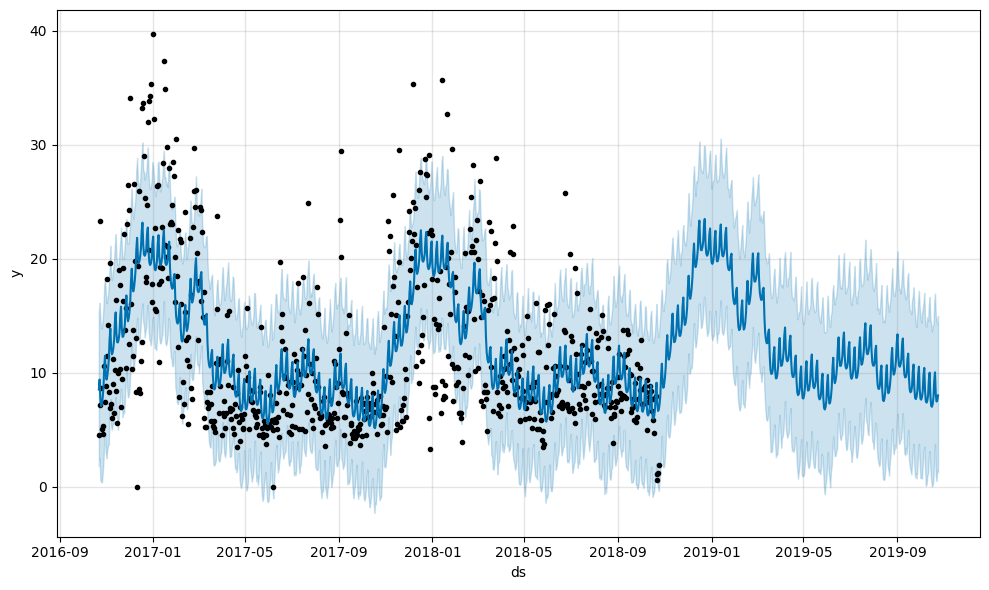

In [34]:
fig = model.plot(forecast22)
plt.show()

In [42]:
# Display the forecast for the specified future dates
forcast_df11=print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

             ds       yhat  yhat_lower  yhat_upper
0    2016-10-22   8.531794    1.345401   15.262723
1    2016-10-23   9.411910    2.607067   16.327656
2    2016-10-24   7.669417    1.094761   14.790024
3    2016-10-25   7.078490    0.764198   14.284711
4    2016-10-26   7.280533    0.353058   14.548011
...         ...        ...         ...         ...
1093 2019-10-20  10.044013    3.290396   17.118407
1094 2019-10-21   8.186387    1.650017   14.835381
1095 2019-10-22   7.482311    0.147034   14.161268
1096 2019-10-23   7.576062    0.814816   14.741476
1097 2019-10-24   8.019992    1.053095   15.338413

[1098 rows x 4 columns]


In [40]:
print(forecast[['ds', ]])

             ds
0    2016-10-22
1    2016-10-23
2    2016-10-24
3    2016-10-25
4    2016-10-26
...         ...
1093 2019-10-20
1094 2019-10-21
1095 2019-10-22
1096 2019-10-23
1097 2019-10-24

[1098 rows x 1 columns]


In [41]:
# Filter rows where both yhat_lower and yhat_upper are positive
positive_interval_rows = forecast[(forecast['yhat_lower'] > 0) & (forecast['yhat_upper'] > 0)]

# Display the filtered DataFrame
positive_interval_rows

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-10-22,12.103200,1.345401,15.262723,12.103200,12.103200,-3.571407,-3.571407,-3.571407,1.178736,1.178736,1.178736,-4.750142,-4.750142,-4.750142,0.0,0.0,0.0,8.531794
1,2016-10-23,12.100870,2.607067,16.327656,12.100870,12.100870,-2.688960,-2.688960,-2.688960,1.868814,1.868814,1.868814,-4.557774,-4.557774,-4.557774,0.0,0.0,0.0,9.411910
2,2016-10-24,12.098540,1.094761,14.790024,12.098540,12.098540,-4.429123,-4.429123,-4.429123,-0.095302,-0.095302,-0.095302,-4.333821,-4.333821,-4.333821,0.0,0.0,0.0,7.669417
3,2016-10-25,12.096210,0.764198,14.284711,12.096210,12.096210,-5.017720,-5.017720,-5.017720,-0.937843,-0.937843,-0.937843,-4.079878,-4.079878,-4.079878,0.0,0.0,0.0,7.078490
4,2016-10-26,12.093880,0.353058,14.548011,12.093880,12.093880,-4.813347,-4.813347,-4.813347,-1.015062,-1.015062,-1.015062,-3.798285,-3.798285,-3.798285,0.0,0.0,0.0,7.280533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,2019-10-20,13.287583,3.290396,17.118407,13.028886,13.531284,-3.243569,-3.243569,-3.243569,1.868814,1.868814,1.868814,-5.112383,-5.112383,-5.112383,0.0,0.0,0.0,10.044013
1094,2019-10-21,13.290453,1.650017,14.835381,13.030576,13.535211,-5.104066,-5.104066,-5.104066,-0.095302,-0.095302,-0.095302,-5.008764,-5.008764,-5.008764,0.0,0.0,0.0,8.186387
1095,2019-10-22,13.293323,0.147034,14.161268,13.032289,13.538954,-5.811012,-5.811012,-5.811012,-0.937843,-0.937843,-0.937843,-4.873170,-4.873170,-4.873170,0.0,0.0,0.0,7.482311
1096,2019-10-23,13.296194,0.814816,14.741476,13.034002,13.542696,-5.720132,-5.720132,-5.720132,-1.015062,-1.015062,-1.015062,-4.705069,-4.705069,-4.705069,0.0,0.0,0.0,7.576062


In [43]:
# Filter rows where both yhat_lower and yhat_upper are positive
positive_interval_rows = forecast[(forecast['yhat_lower'] < 0) & (forecast['yhat_upper'] < 0)]


positive_interval_rows

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat


# ANZ dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
anz_df = pd.read_csv(r"/content/anz.csv" )
anz_df

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [3]:
anz_df.drop(['transaction_id','customer_id','merchant_long_lat','movement'],axis=1,inplace=True)
anz_df.drop(['status','first_name','merchant_suburb','merchant_state'],axis=1,inplace=True)
anz_df.drop(['card_present_flag','bpay_biller_code','account','currency','long_lat','txn_description','merchant_id','merchant_code','balance','extraction','country'],axis=1,inplace=True)

In [7]:
anz_df

,date,gender,age,amount
0,8/1/2018,F,26,16.25
1,8/1/2018,F,26,14.19
2,8/1/2018,M,38,6.42
3,8/1/2018,F,40,40.90
4,8/1/2018,F,26,3.25
...,...,...,...,...
12038,10/31/2018,F,30,9.79
12039,10/31/2018,M,20,63.87
12040,10/31/2018,M,28,43.96
12041,10/31/2018,M,69,30.77


In [4]:
anz_df['date'] = pd.to_datetime(anz_df['date'])
anz_df['Year'] = anz_df['date'].dt.year
anz_df['Month'] = anz_df['date'].dt.month
anz_df['Day'] = anz_df['date'].dt.day
anz_df

,date,gender,age,amount,Year,Month,Day
0,2018-08-01,F,26,16.25,2018,8,1
1,2018-08-01,F,26,14.19,2018,8,1
2,2018-08-01,M,38,6.42,2018,8,1
3,2018-08-01,F,40,40.90,2018,8,1
4,2018-08-01,F,26,3.25,2018,8,1
...,...,...,...,...,...,...,...
12038,2018-10-31,F,30,9.79,2018,10,31
12039,2018-10-31,M,20,63.87,2018,10,31
12040,2018-10-31,M,28,43.96,2018,10,31
12041,2018-10-31,M,69,30.77,2018,10,31


In [5]:
anz_df.isna().sum()

date      0
gender    0
age       0
amount    0
Year      0
Month     0
Day       0
dtype: int64

In [6]:
anz_df2 = anz_df.copy()

In [7]:
anz_df2 = anz_df.rename(columns={"date": "ds", "amount": "y"})
anz_df2

,ds,gender,age,y,Year,Month,Day
0,2018-08-01,F,26,16.25,2018,8,1
1,2018-08-01,F,26,14.19,2018,8,1
2,2018-08-01,M,38,6.42,2018,8,1
3,2018-08-01,F,40,40.90,2018,8,1
4,2018-08-01,F,26,3.25,2018,8,1
...,...,...,...,...,...,...,...
12038,2018-10-31,F,30,9.79,2018,10,31
12039,2018-10-31,M,20,63.87,2018,10,31
12040,2018-10-31,M,28,43.96,2018,10,31
12041,2018-10-31,M,69,30.77,2018,10,31


In [8]:
anz_df2.drop(['gender','age','Year','Month','Day'],axis=1,inplace=True)

In [9]:
anz_df2

,ds,y
0,2018-08-01,16.25
1,2018-08-01,14.19
2,2018-08-01,6.42
3,2018-08-01,40.90
4,2018-08-01,3.25
...,...,...
12038,2018-10-31,9.79
12039,2018-10-31,63.87
12040,2018-10-31,43.96
12041,2018-10-31,30.77


In [10]:
model = Prophet()
model.fit(anz_df2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpasqdeit3/pdqv75y_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpasqdeit3/6l43tsjp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19774', 'data', 'file=/tmp/tmpasqdeit3/pdqv75y_.json', 'init=/tmp/tmpasqdeit3/6l43tsjp.json', 'output', 'file=/tmp/tmpasqdeit3/prophet_modeljvdqhmy9/prophet_model-20240113134858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:48:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:48:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
future = model.make_future_dataframe(periods=183)

In [12]:
forecast = model.predict(future)

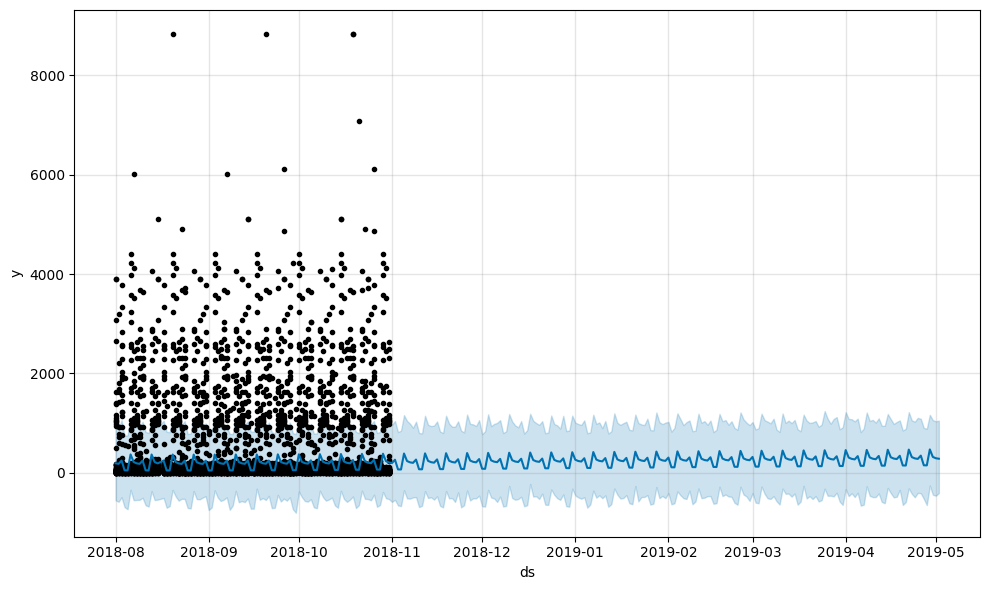

In [13]:
fig = model.plot(forecast)
plt.show()

In [14]:
# Display the forecast for the specified future dates
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds        yhat  yhat_lower   yhat_upper
0   2018-08-01  192.468857 -552.044783   952.368335
1   2018-08-02  181.800112 -583.211374   879.552870
2   2018-08-03  247.093944 -490.823072  1059.455291
3   2018-08-04   51.828870 -690.664069   743.586334
4   2018-08-05   49.829007 -731.768714   756.037038
..         ...         ...         ...          ...
269 2019-04-28  150.537501 -648.643809   889.733296
270 2019-04-29  471.368924 -255.257181  1167.152118
271 2019-04-30  320.556249 -440.318236  1062.216705
272 2019-05-01  294.120858 -460.653204  1036.966864
273 2019-05-02  284.043518 -408.665266  1050.643870

[274 rows x 4 columns]


In [15]:
print(forecast[['ds', ]])

            ds
0   2018-08-01
1   2018-08-02
2   2018-08-03
3   2018-08-04
4   2018-08-05
..         ...
269 2019-04-28
270 2019-04-29
271 2019-04-30
272 2019-05-01
273 2019-05-02

[274 rows x 1 columns]


In [16]:
Forcast_df=(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

In [17]:
# Filter rows where both yhat_lower and yhat_upper are positive
positive_interval_rows = forecast[(forecast['yhat_lower'] > 0) & (forecast['yhat_upper'] > 0)]

positive_interval_rows

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
